Big Data Mart Sales Problem

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

Note: You can find the dataset in the link below.
Downlaod Files:

    https://github.com/dsrscientist/bigdatamart_rep

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [113]:
df=pd.read_csv('bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [114]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [116]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [117]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [118]:
df['Item_Weight']=df['Item_Weight'].replace(np.nan,np.mean(df['Item_Weight']))

In [119]:
df=df.dropna()
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

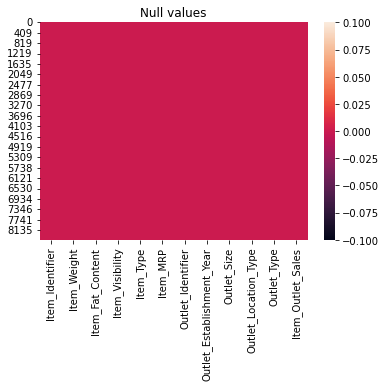

In [120]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [121]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['Item_Identifier']=enc.fit_transform(df['Item_Identifier'].values.reshape(-1,1))
df['Item_Fat_Content']=enc.fit_transform(df['Item_Fat_Content'].values.reshape(-1,1))
df['Item_Type']=enc.fit_transform(df['Item_Type'].values.reshape(-1,1))
df['Outlet_Identifier']=enc.fit_transform(df['Outlet_Identifier'].values.reshape(-1,1))
df['Outlet_Size']=enc.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
df['Outlet_Location_Type']=enc.fit_transform(df['Outlet_Location_Type'].values.reshape(-1,1))
df['Outlet_Type']=enc.fit_transform(df['Outlet_Type'].values.reshape(-1,1))

In [122]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,777.985441,12.888856,1.368232,0.064505,7.221004,141.256859,3.065434,1995.794373,1.238181,1.066579,1.371340,2322.688445
std,447.570111,4.073798,0.644920,0.050092,4.208809,62.229701,2.047450,8.842615,0.697463,0.918461,0.843928,1741.592093
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.955800
25%,396.000000,9.800000,1.000000,0.026681,4.000000,94.012000,1.000000,1987.000000,1.000000,0.000000,1.000000,974.731200
50%,781.000000,12.857645,1.000000,0.052811,6.000000,143.178600,3.000000,1997.000000,1.000000,1.000000,1.000000,1928.156800
75%,1163.000000,15.700000,2.000000,0.092834,10.000000,185.892400,5.000000,2004.000000,2.000000,2.000000,2.000000,3271.075400
max,1554.000000,21.350000,4.000000,0.328391,15.000000,266.888400,6.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

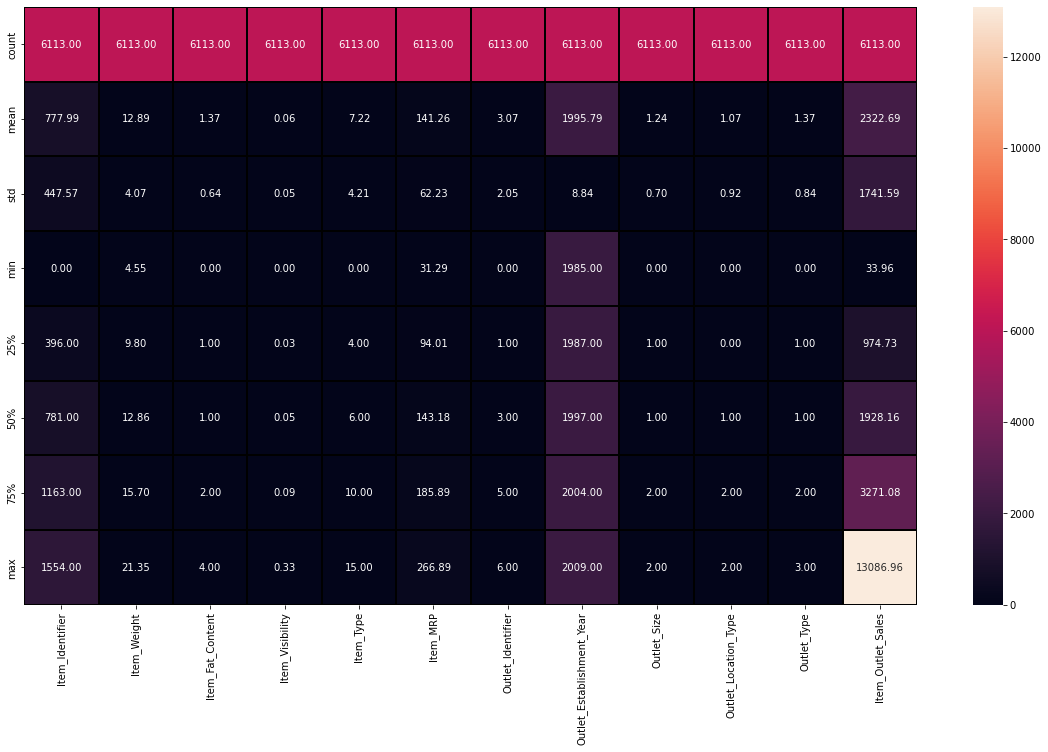

In [123]:
plt.figure(figsize=(20,11))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [124]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044741,-0.094814,-0.028210,-0.014686,0.016637,-0.008299,-0.014229,0.001672,0.000622,0.002709,0.010437
Item_Weight,0.044741,1.000000,-0.026781,-0.008526,0.029920,0.029214,-0.005871,-0.004779,-0.011612,0.003330,-0.002678,0.008007
Item_Fat_Content,-0.094814,-0.026781,1.000000,0.034027,-0.117690,-0.000066,-0.002514,-0.004422,-0.013875,-0.003003,-0.006880,0.004729
Item_Visibility,-0.028210,-0.008526,0.034027,1.000000,-0.025506,-0.000651,-0.039651,-0.087452,0.096773,-0.103078,-0.144951,-0.105854
Item_Type,-0.014686,0.029920,-0.117690,-0.025506,1.000000,0.036465,0.004036,0.005424,-0.001771,0.003727,0.004805,0.020482
Item_MRP,0.016637,0.029214,-0.000066,-0.000651,0.036465,1.000000,0.000088,0.011632,0.005827,0.000321,-0.004840,0.588939
Outlet_Identifier,-0.008299,-0.005871,-0.002514,-0.039651,0.004036,0.000088,1.000000,0.222275,0.568595,-0.765696,-0.139811,0.083344
Outlet_Establishment_Year,-0.014229,-0.004779,-0.004422,-0.087452,0.005424,0.011632,0.222275,1.000000,0.298431,-0.089391,-0.048919,-0.057850
Outlet_Size,0.001672,-0.011612,-0.013875,0.096773,-0.001771,0.005827,0.568595,0.298431,1.000000,-0.635185,-0.297053,-0.129076
Outlet_Location_Type,0.000622,0.003330,-0.003003,-0.103078,0.003727,0.000321,-0.765696,-0.089391,-0.635185,1.000000,0.670156,0.206719


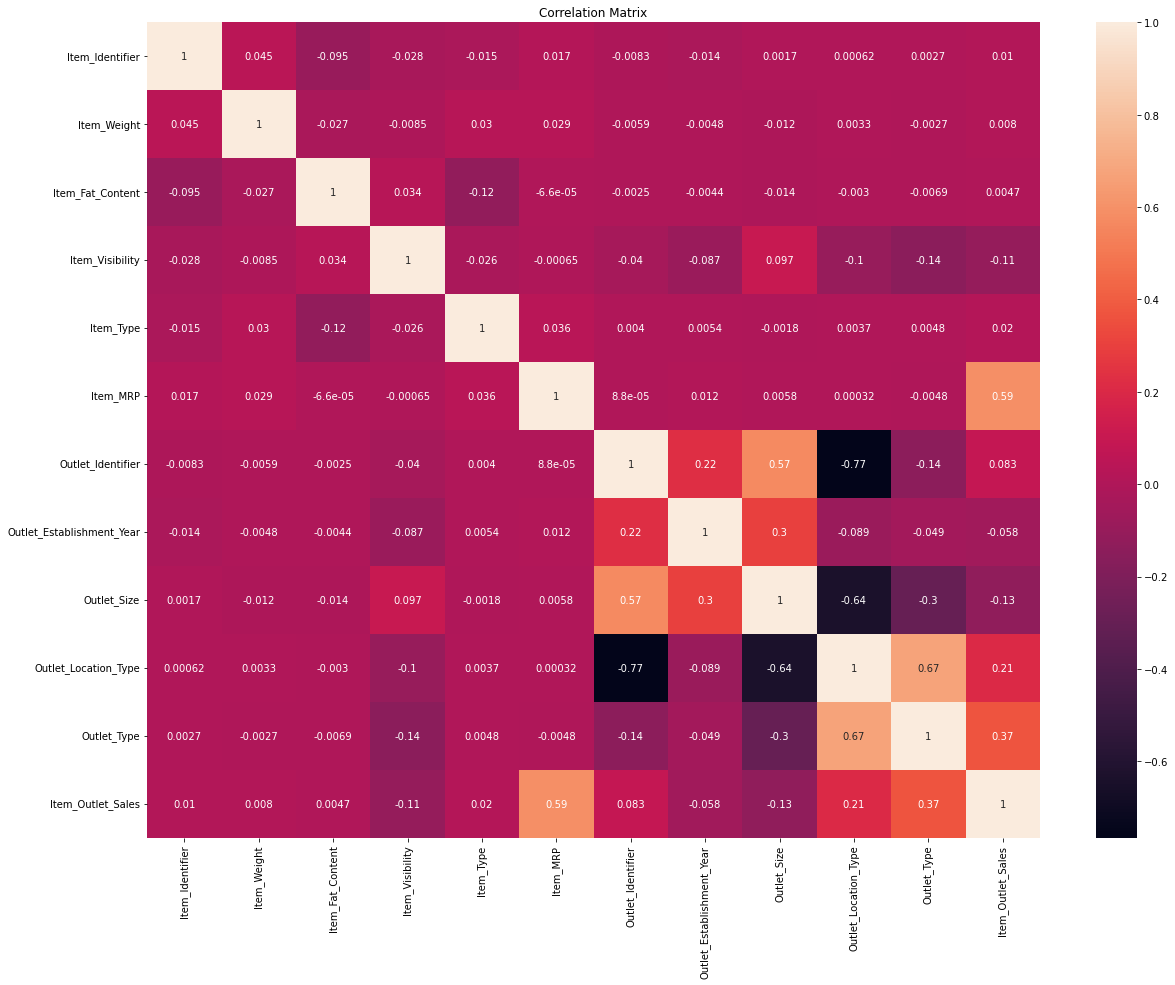

In [125]:
corr_mat=df.corr()
plt.figure(figsize=[20,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [126]:
df.corr()['Item_Outlet_Sales'].sort_values()

Outlet_Size                 -0.129076
Item_Visibility             -0.105854
Outlet_Establishment_Year   -0.057850
Item_Fat_Content             0.004729
Item_Weight                  0.008007
Item_Identifier              0.010437
Item_Type                    0.020482
Outlet_Identifier            0.083344
Outlet_Location_Type         0.206719
Outlet_Type                  0.368181
Item_MRP                     0.588939
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

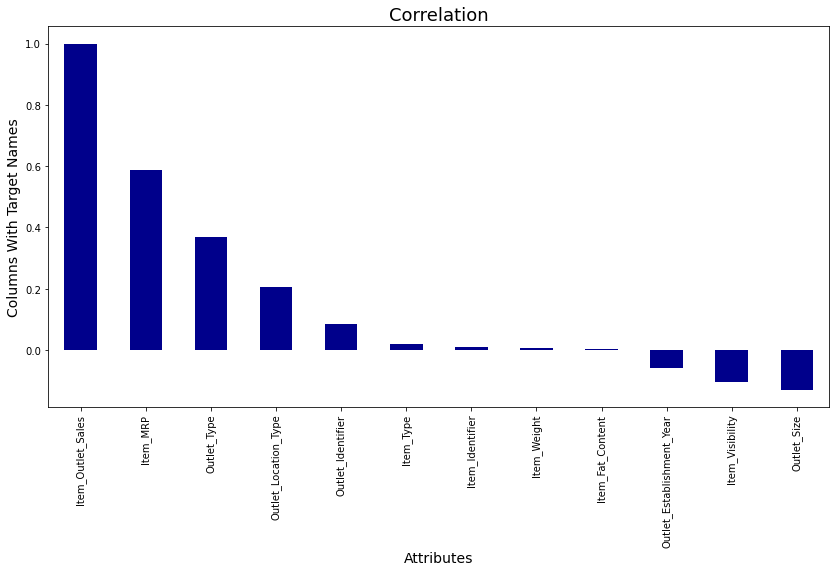

In [127]:
plt.figure(figsize=(14,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).plot(kind='bar',color='darkblue')
plt.xlabel('Attributes',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

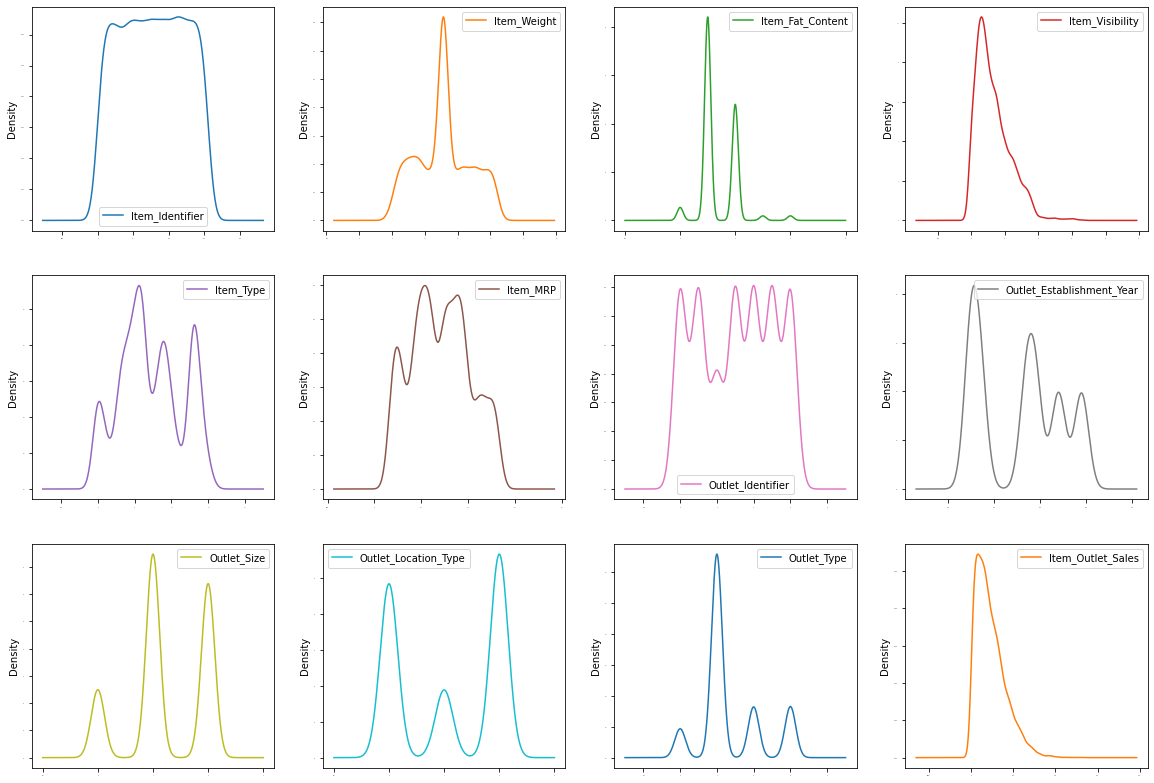

In [128]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(20,14))
plt.show()

# Outliers:

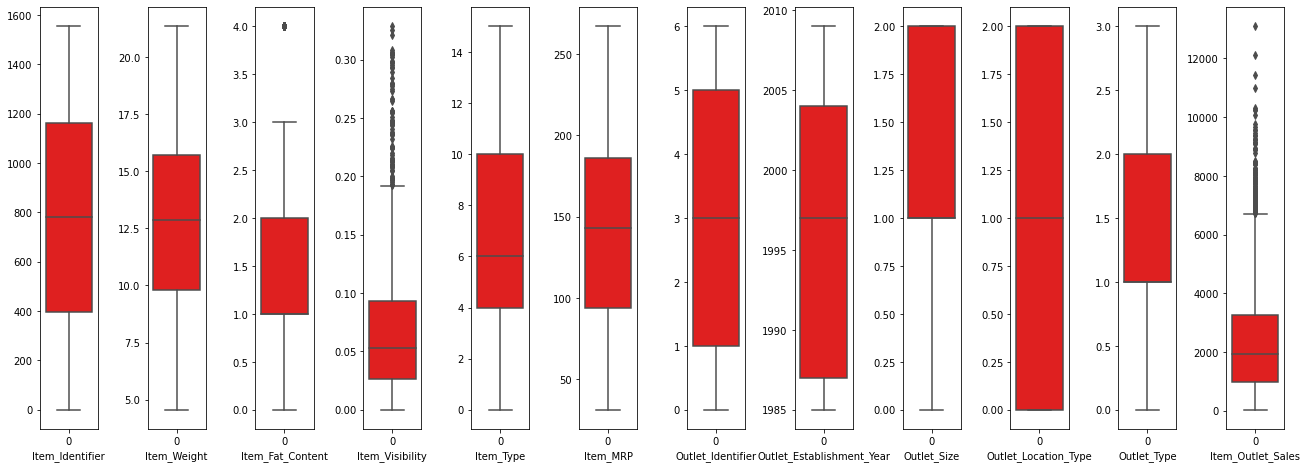

In [129]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(1.5*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='red',orient='v')
    plt.xlabel(collist[i],fontsize=10)
    plt.tight_layout()

In [130]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:]))
z.shape

(6113, 12)

In [131]:
threshold=3
np.where(z>3)

(array([  39,   60,   62,   82,   94,  108,  143,  231,  262,  281,  309,
         327,  337,  349,  431,  517,  535,  535,  574,  599,  608,  613,
         640,  710,  725,  726,  803,  811,  831,  851,  869,  896,  945,
        1016, 1017, 1030, 1068, 1071, 1077, 1095, 1100, 1107, 1121, 1122,
        1154, 1253, 1265, 1293, 1309, 1427, 1468, 1501, 1502, 1598, 1651,
        1724, 1725, 1779, 1805, 1829, 1846, 1882, 1976, 2062, 2071, 2121,
        2122, 2147, 2151, 2201, 2207, 2247, 2288, 2302, 2316, 2347, 2382,
        2404, 2463, 2472, 2477, 2485, 2499, 2526, 2530, 2553, 2567, 2637,
        2647, 2667, 2672, 2677, 2762, 2846, 2853, 2907, 3020, 3053, 3054,
        3088, 3090, 3113, 3124, 3138, 3226, 3326, 3327, 3330, 3331, 3399,
        3462, 3480, 3553, 3596, 3600, 3607, 3673, 3676, 3695, 3701, 3729,
        3862, 3905, 3925, 4002, 4011, 4084, 4101, 4130, 4197, 4253, 4274,
        4294, 4386, 4387, 4414, 4415, 4529, 4544, 4551, 4580, 4621, 4625,
        4639, 4678, 4681, 4682, 4720, 

In [132]:
len(np.where(z>3)[0])

197

In [133]:
df_new=df[(z<3).all(axis=1)]

In [134]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155.0,9.300,1.0,0.016047,4.0,249.8092,6.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,1.0,2009,1.0,2.0,2.0,443.4228
2,661.0,17.500,1.0,0.016760,10.0,141.6180,6.0,1999,1.0,0.0,1.0,2097.2700
4,1294.0,8.930,1.0,0.000000,9.0,53.8614,0.0,1987,0.0,2.0,1.0,994.7052
5,757.0,10.395,2.0,0.000000,0.0,51.4008,1.0,2009,1.0,2.0,2.0,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8516,1353.0,18.600,1.0,0.118661,11.0,58.7588,1.0,2009,1.0,2.0,2.0,858.8820
8518,369.0,6.865,1.0,0.056783,13.0,214.5218,0.0,1987,0.0,2.0,1.0,2778.3834
8520,1354.0,10.600,1.0,0.035186,8.0,85.1224,4.0,2004,2.0,1.0,1.0,1193.1136
8521,680.0,7.210,2.0,0.145221,13.0,103.1332,1.0,2009,1.0,2.0,2.0,1845.5976


In [135]:
print("Percentage Lost: ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Percentage Lost:  3.2062816947488955


In [136]:
x=df_new.drop(['Item_Outlet_Sales'],axis=1)
y=df_new['Item_Outlet_Sales']

In [137]:
x.skew()

Item_Identifier             -0.014167
Item_Weight                  0.087119
Item_Fat_Content             0.274481
Item_Visibility              0.786992
Item_Type                    0.097657
Item_MRP                     0.136490
Outlet_Identifier           -0.102231
Outlet_Establishment_Year    0.023683
Outlet_Size                 -0.355973
Outlet_Location_Type        -0.139970
Outlet_Type                  0.773687
dtype: float64

In [138]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [139]:
x.skew()

Item_Identifier             -0.295673
Item_Weight                 -0.059643
Item_Fat_Content             0.016001
Item_Visibility              0.115618
Item_Type                   -0.165084
Item_MRP                    -0.112486
Outlet_Identifier           -0.238532
Outlet_Establishment_Year    0.000000
Outlet_Size                 -0.193491
Outlet_Location_Type        -0.191024
Outlet_Type                  0.004648
dtype: float64

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)

At random state 0,the training accuracy is:- 0.531223720826671
At random state 0,the testing accuracy is:- 0.519680668721805


At random state 1,the training accuracy is:- 0.5343394985489088
At random state 1,the testing accuracy is:- 0.5057897608311077


At random state 2,the training accuracy is:- 0.5292749485445425
At random state 2,the testing accuracy is:- 0.5279053013676696


At random state 3,the training accuracy is:- 0.5316256715128681
At random state 3,the testing accuracy is:- 0.5190505743434565


At random state 4,the training accuracy is:- 0.5286523878953167
At random state 4,the testing accuracy is:- 0.5285269217140898


At random state 5,the training accuracy is:- 0.5362394010225611
At random state 5,the testing accuracy is:- 0.4958323607385696


At random state 6,the training accuracy is:- 0.5316987043148004
At random state 6,the testing accuracy is:- 0.5173595007774621


At random state 7,the training accuracy is:- 0.5325430225835287
At random state 7,the testing accur

At random state 63,the testing accuracy is:- 0.5043362358641452


At random state 64,the training accuracy is:- 0.5226352127174221
At random state 64,the testing accuracy is:- 0.5521917237021934


At random state 65,the training accuracy is:- 0.5307568217547707
At random state 65,the testing accuracy is:- 0.5215867923740374


At random state 66,the training accuracy is:- 0.5310908176942429
At random state 66,the testing accuracy is:- 0.5210977078305806


At random state 67,the training accuracy is:- 0.5291179909931147
At random state 67,the testing accuracy is:- 0.5275349047762046


At random state 68,the training accuracy is:- 0.5233881853283684
At random state 68,the testing accuracy is:- 0.5525442789952302


At random state 69,the training accuracy is:- 0.5283445497181253
At random state 69,the testing accuracy is:- 0.5320213006506347


At random state 70,the training accuracy is:- 0.5282254110565499
At random state 70,the testing accuracy is:- 0.5320939677603902


At random state 7

In [141]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt.fit(features_train,target_train)
    pred_train=dt.predict(features_train)
    pred_test=dt.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",round(maxAcc*100,2),"% on Random State: ",maxRS)

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 0.06117472139843272


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 0.07803803042622126


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 0.17610089681668895


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 0.16916393384670925


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 0.08464157822578433


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- -0.02285274211953281


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 0.15541842129425665


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 0.1754156482336049


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing a

At random state 71,the training accuracy is:- 1.0
At random state 71,the testing accuracy is:- 0.1904824422964978


At random state 72,the training accuracy is:- 1.0
At random state 72,the testing accuracy is:- 0.10497921577210034


At random state 73,the training accuracy is:- 1.0
At random state 73,the testing accuracy is:- 0.07951259209689954


At random state 74,the training accuracy is:- 1.0
At random state 74,the testing accuracy is:- 0.14143541628891243


At random state 75,the training accuracy is:- 1.0
At random state 75,the testing accuracy is:- 0.13714865700244283


At random state 76,the training accuracy is:- 1.0
At random state 76,the testing accuracy is:- 0.12045910113589886


At random state 77,the training accuracy is:- 1.0
At random state 77,the testing accuracy is:- 0.053683528468206454


At random state 78,the training accuracy is:- 1.0
At random state 78,the testing accuracy is:- 0.1604948934805911


At random state 79,the training accuracy is:- 1.0
At random state

In [142]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    rf.fit(features_train,target_train)
    pred_train=rf.predict(features_train)
    pred_test=rf.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",round(maxAcc*100,2),"% on Random State: ",maxRS)

At random state 0,the training accuracy is:- 0.9329696828240948
At random state 0,the testing accuracy is:- 0.5183691097998993


At random state 1,the training accuracy is:- 0.9331501911512705
At random state 1,the testing accuracy is:- 0.5052481159677129


At random state 2,the training accuracy is:- 0.9338269998278017
At random state 2,the testing accuracy is:- 0.5566990028643775


At random state 3,the training accuracy is:- 0.933384983605656
At random state 3,the testing accuracy is:- 0.5366433677448086


At random state 4,the training accuracy is:- 0.9327536144132865
At random state 4,the testing accuracy is:- 0.5471483327367435


At random state 5,the training accuracy is:- 0.9359221394662695
At random state 5,the testing accuracy is:- 0.48019717174923104


At random state 6,the training accuracy is:- 0.9340698506103783
At random state 6,the testing accuracy is:- 0.5386702952665421


At random state 7,the training accuracy is:- 0.9348347317145027
At random state 7,the testing acc

At random state 63,the training accuracy is:- 0.9336935175546136
At random state 63,the testing accuracy is:- 0.4974301806803674


At random state 64,the training accuracy is:- 0.9342014347275182
At random state 64,the testing accuracy is:- 0.5262554636522899


At random state 65,the training accuracy is:- 0.9342261541504538
At random state 65,the testing accuracy is:- 0.49037828422942986


At random state 66,the training accuracy is:- 0.9336230248050942
At random state 66,the testing accuracy is:- 0.5298207408442103


At random state 67,the training accuracy is:- 0.9338991310603041
At random state 67,the testing accuracy is:- 0.5255111041318364


At random state 68,the training accuracy is:- 0.9327271489338846
At random state 68,the testing accuracy is:- 0.5449468652753131


At random state 69,the training accuracy is:- 0.9337186010296216
At random state 69,the testing accuracy is:- 0.5096066535350102


At random state 70,the training accuracy is:- 0.9324404363276713
At random state 7

In [145]:
features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=78)

In [146]:
pred_test=rf.predict(features_test)
print('Accuracy',r2_score(target_test,pred_test)*100)

Accuracy 84.67353657686388


# Cross Validation:

In [147]:
train_acc=r2_score(target_train,pred_train)
test_acc=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At Cross fold {j} cv score:{cv_mean} Accuracy Training: {train_acc} Accuracy Testing:{test_acc}")
    print('\n')

At Cross fold 2 cv score:0.5160431947033665 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 3 cv score:0.5209131465155924 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 4 cv score:0.5155344870075058 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 5 cv score:0.5182022224344335 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 6 cv score:0.5241350074877456 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 7 cv score:0.5182909683893201 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 8 cv score:0.5158035062209982 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388


At Cross fold 9 cv score:0.5178773253257241 Accuracy Training: -0.7740455221062781 Accuracy Testing:0.8467353657686388




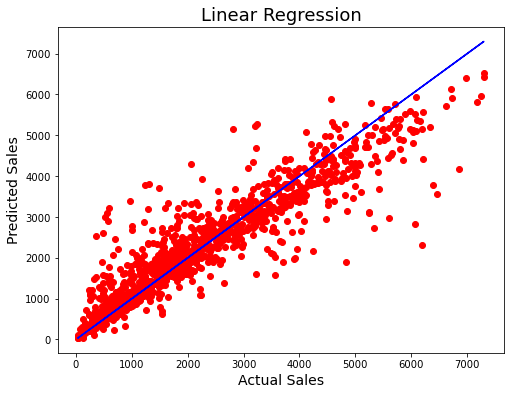

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [150]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],
            'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [151]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

51.951485028284154

In [152]:
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
print(round(lss*100,2),'%')

56.89 %


In [153]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
print(round(cv_mean*100,2),'%')

52.65 %


# Hyper-Tuning

In [154]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [155]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score:',rfc*100)

R2 Score: 60.19170311245472
Cross Validation Score: 55.03778126342155


In [156]:
import joblib
joblib.dump(rf,'Big Data Mart Sales Model.pkl')

['Big Data Mart Sales Model.pkl']